In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
path='/content/drive/MyDrive/PHA/dataset/disease_dataset.csv'

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head()

,Diseases,nasal_congeston,skin_rashes,eye_irritation,headache,itchy_throat,sneezing,bowel_movements,fainting,swelling_lips,...,wheezing_when_exhaling,wheezing_attacks,red_skin,weakness,muscle_wasting,breadth_shortness,weight_gain,urinating_pain,bloody_pee,frequent_peeing
0,Allergies,0,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Cold and Flu,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Conjunctivitis,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Diarrhea,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gastroenteritis,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
disease_counts = df["Diseases"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

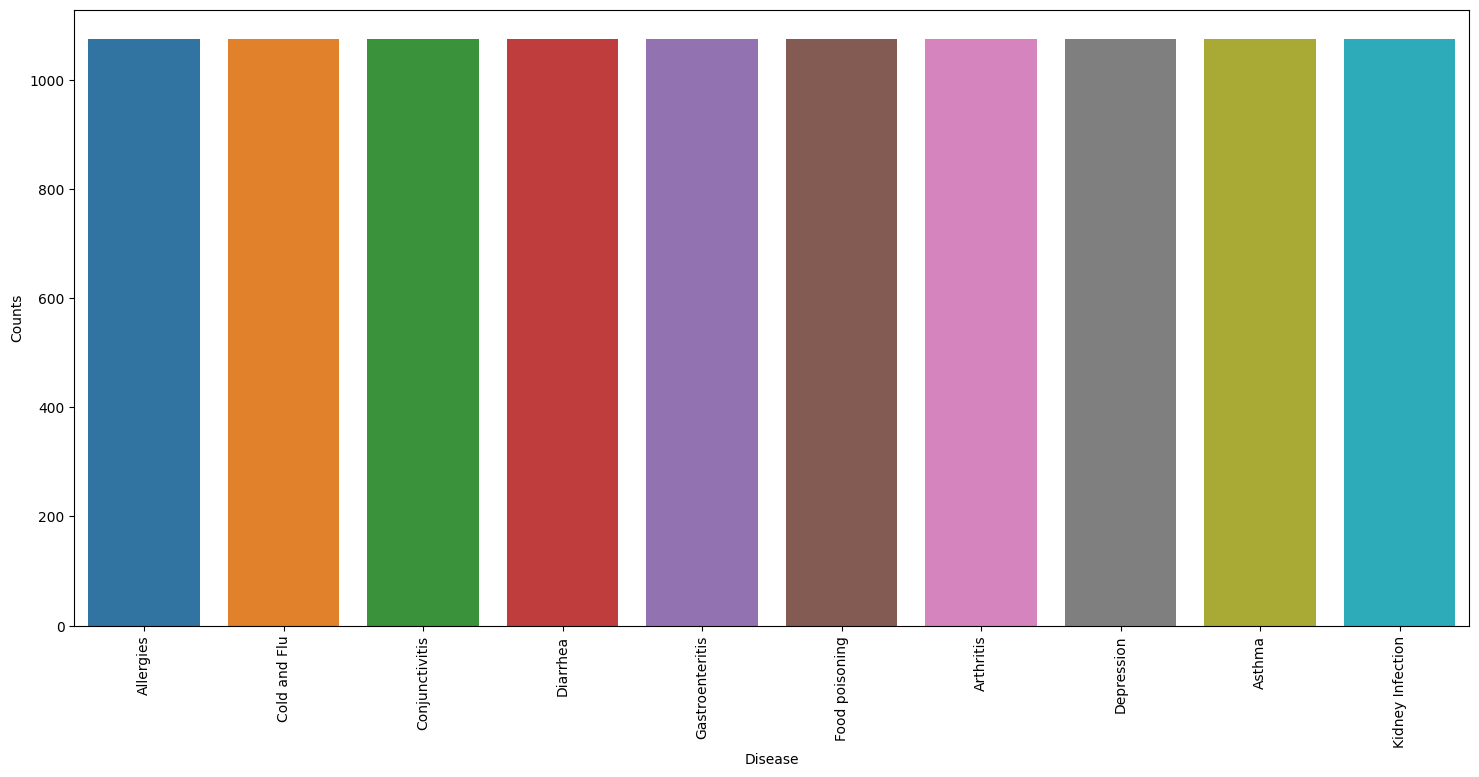

In [ ]:
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
disease_counts

Allergies           1075
Cold and Flu        1075
Conjunctivitis      1075
Diarrhea            1075
Gastroenteritis     1075
Food poisoning      1075
Arthritis           1075
Depression          1075
Asthma              1075
Kidney Infection    1075
Name: Diseases, dtype: int64

In [ ]:
encoder = LabelEncoder()
df["Diseases"] = encoder.fit_transform(df["Diseases"])

In [ ]:
df.head(20)

,Diseases,nasal_congeston,skin_rashes,eye_irritation,headache,itchy_throat,sneezing,bowel_movements,fainting,swelling_lips,...,wheezing_when_exhaling,wheezing_attacks,red_skin,weakness,muscle_wasting,breadth_shortness,weight_gain,urinating_pain,bloody_pee,frequent_peeing
0,0,0,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [ ]:

X = df.iloc[:,1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)
 
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (8600, 65), (8600,)
Test: (2150, 65), (2150,)


In [ ]:
X

,nasal_congeston,skin_rashes,eye_irritation,headache,itchy_throat,sneezing,bowel_movements,fainting,swelling_lips,runny_nose,...,wheezing_when_exhaling,wheezing_attacks,red_skin,weakness,muscle_wasting,breadth_shortness,weight_gain,urinating_pain,bloody_pee,frequent_peeing
0,0,1,1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10745,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10746,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10747,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10748,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

0        0
1        3
2        4
3        6
4        8
        ..
10745    8
10746    8
10747    8
10748    8
10749    8
Name: Diseases, Length: 10750, dtype: int64

In [ ]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

In [ ]:
# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

In [ ]:
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


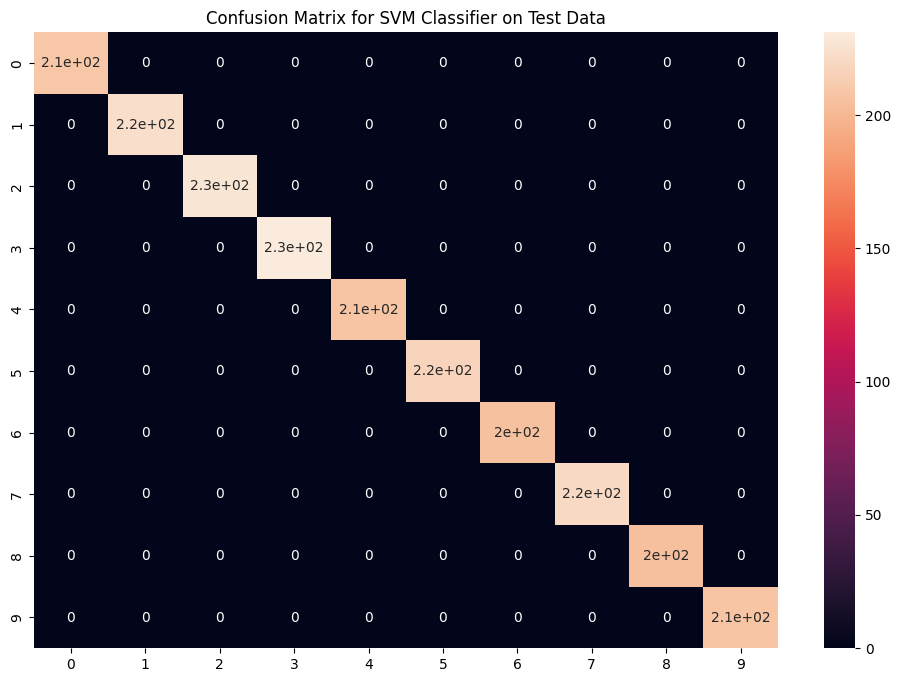

In [ ]:

# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
 
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


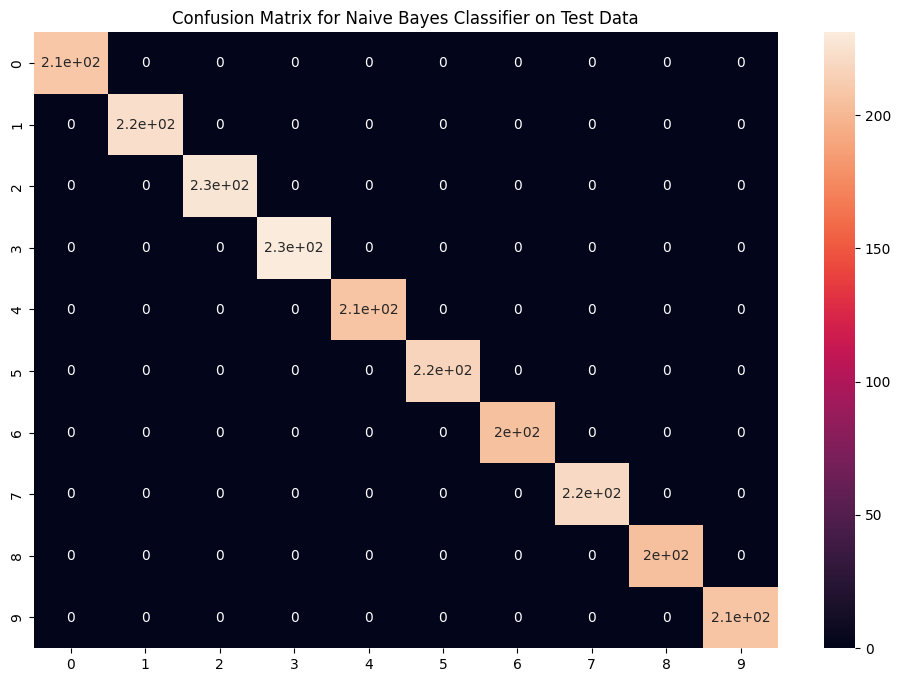

In [ ]:
# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


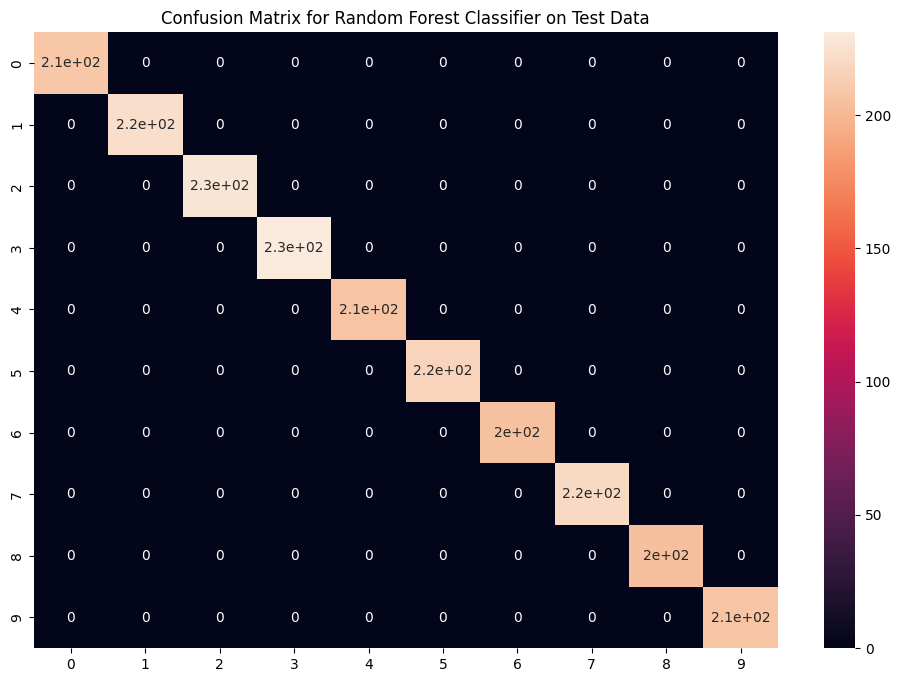

In [ ]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds)*100}")
 
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [ ]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

RandomForestClassifier(random_state=18)

In [ ]:
# Reading the test data
test_data = pd.read_csv("/content/drive/MyDrive/PHA/dataset/testing.csv")
test_X = test_data.iloc[:, 1:]

In [ ]:
test_X

,nasal_congeston,skin_rashes,eye_irritation,headache,itchy_throat,sneezing,bowel_movements,fainting,swelling_lips,runny_nose,...,wheezing_when_exhaling,wheezing_attacks,red_skin,weakness,muscle_wasting,breadth_shortness,weight_gain,urinating_pain,bloody_pee,frequent_peeing
0,0,1,1,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [ ]:
test_Y = encoder.transform(test_data.iloc[:,0])

In [ ]:
test_Y

array([0, 3, 4, 6, 8, 7, 1, 5, 2, 9, 3, 4, 6, 8, 7, 1])

<ipython-input-24-015abfb9d825>:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_preds = [mode([i,j,k])[0][0] for i,j,


Accuracy on Test dataset by the combined model: 100.0


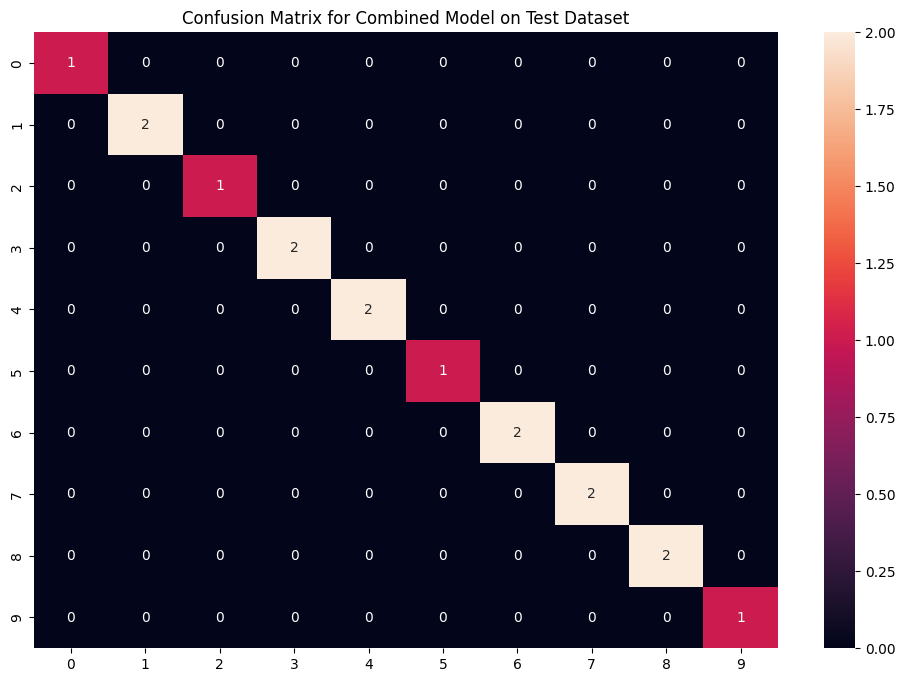

In [ ]:
# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)
 
final_preds = [mode([i,j,k])[0][0] for i,j,
               k in zip(svm_preds, nb_preds, rf_preds)]
 
print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")
 
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
 
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [ ]:

symptoms = X.columns.values

In [ ]:
symptoms

array(['nasal_congeston', 'skin_rashes', 'eye_irritation', 'headache',
       'itchy_throat', 'sneezing', 'bowel_movements', 'fainting',
       'swelling_lips', 'runny_nose', 'cough',
       'gastrointestinal_distress', 'fever', 'breathing_difficulty',
       'fatigue', 'sore_throat', 'puffy_eyes', 'cramps', 'loose_stools',
       'nausea', 'bloating', 'abdominal_pain', 'diarrhoea',
       'burning_sensation', 'red_eye', 'itchy_eyes', 'dry_cough',
       'body_ache', 'appetite_loss', 'upset_stomach', 'abdominal_cramps',
       'pus_like_discharge', 'aching_muscles', 'stomach_pains',
       'joint_pain', 'breathing_problems', 'loss_of_appetite', 'chills',
       'aching_limbs', 'vomiting', 'headaches', 'sad_feelings',
       'angry_outbursts', 'interest_loss', 'tiredness',
       'sleep_disturbances', 'weight_loss', 'tender_bones', 'anxiety',
       'physical_constraints', 'stiff_bones', 'bone_inflammation',
       'restricted_movement', 'troubled_thinking', 'chest_tightness',
       'w

In [ ]:

symptom_index = {}

for index, value in enumerate(symptoms):

    symptom = " ".join([i.capitalize() for i in value.split("_")])

    symptom_index[symptom] = index
 

data_dict = {

    "symptom_index":symptom_index,

    "predictions_classes":encoder.classes_
}

In [ ]:
data_dict["symptom_index"]

{'Nasal Congeston': 0,
 'Skin Rashes': 1,
 'Eye Irritation': 2,
 'Headache': 3,
 'Itchy Throat': 4,
 'Sneezing': 5,
 'Bowel Movements': 6,
 'Fainting': 7,
 'Swelling Lips': 8,
 'Runny Nose': 9,
 'Cough': 10,
 'Gastrointestinal Distress': 11,
 'Fever': 12,
 'Breathing Difficulty': 13,
 'Fatigue': 14,
 'Sore Throat': 15,
 'Puffy Eyes': 16,
 'Cramps': 17,
 'Loose Stools': 18,
 'Nausea': 19,
 'Bloating': 20,
 'Abdominal Pain': 21,
 'Diarrhoea': 22,
 'Burning Sensation': 23,
 'Red Eye': 24,
 'Itchy Eyes': 25,
 'Dry Cough': 26,
 'Body Ache': 27,
 'Appetite Loss': 28,
 'Upset Stomach': 29,
 'Abdominal Cramps': 30,
 'Pus Like Discharge': 31,
 'Aching Muscles': 32,
 'Stomach Pains': 33,
 'Joint Pain': 34,
 'Breathing Problems': 35,
 'Loss Of Appetite': 36,
 'Chills': 37,
 'Aching Limbs': 38,
 'Vomiting': 39,
 'Headaches': 40,
 'Sad Feelings': 41,
 'Angry Outbursts': 42,
 'Interest Loss': 43,
 'Tiredness': 44,
 'Sleep Disturbances': 45,
 'Weight Loss': 46,
 'Tender Bones': 47,
 'Anxiety': 48,
 '

In [ ]:
def predictDiseas(symptoms):

    symptoms = symptoms.split(",")

     

    # creating input data for the models

    input_data = [0] * len(data_dict["symptom_index"])

    for symptom in symptoms:

        #index = data_dict["symptom_index"][symptom]

       # input_data[index] = 1
        print(symptom)

In [ ]:
input_data=None
def predictDisease(symptoms):

    symptoms = symptoms.split(",")

     

    # creating input data for the models

    input_data = [0] * len(data_dict["symptom_index"])

    for symptom in symptoms:

        index = data_dict["symptom_index"][symptom]

        input_data[index] = 1

         

    # reshaping the input data and converting it

    # into suitable format for model predictions

    input_data = np.array(input_data).reshape(1,-1)

     
    print(input_data)
    # generating individual outputs

    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]

    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]

    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
     

    # making final prediction by taking mode of all predictions

    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]

    predictions = {

        "rf_model_prediction": rf_prediction,

        "naive_bayes_prediction": nb_prediction,

        "svm_model_prediction": svm_prediction,

        "final_prediction":final_prediction

    }

    return predictions

In [ ]:
print(predictDisease("Tiredness,Sad Feelings,Sleep Disturbances,Weight Gain,Fever"))

[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]
{'rf_model_prediction': 'Depression', 'naive_bayes_prediction': 'Depression', 'svm_model_prediction': 'Depression', 'final_prediction': 'Depression'}


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-30-daf00c2f4593>:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_prediction = mode([rf_p

In [ ]:
! pip install skl2onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 36.4 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade tflite-model-maker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install onnx-tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.4 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [ ]:
import tensorflow as tf
import onnxruntime as ort

In [ ]:
session = ort.InferenceSession('/content/drive/MyDrive/PHA/nb_model_prediction.onnx')

# Convert the ONNX model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_session(session)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

AttributeError: ignored

In [ ]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import Int64TensorType

# Convert the sklearn model to ONNX format
initial_type = [('int_input', Int64TensorType([None, 65]))]
onnx_model1 = convert_sklearn(final_rf_model, initial_types=initial_type)

# Save the ONNX model to a file
with open('/content/drive/MyDrive/PHA/rf_model_prediction.onnx', 'wb') as f:
    f.write(onnx_model1.SerializeToString())

In [ ]:
# Convert the ONNX model to TensorFlow Lite format
model_spec = tflite.model_spec.from_onnx_model(onnx_model1)
tflite_converter = tflite.TFLiteConverter.from_model_spec(model_spec)
tflite_model = tflite_converter.convert()

# Save the TensorFlow Lite model to a file
with open("/content/drive/MyDrive/PHA/rf_model.tflite", "wb") as f:
    f.write(tflite_model)

AttributeError: ignored

In [ ]:
print(tf. __version__)

2.12.0


In [ ]:


# Convert the sklearn model to ONNX format
initial_type = [('int_input', Int64TensorType([None, 65]))]
onnx_model = convert_sklearn(final_nb_model, initial_types=initial_type)

# Save the ONNX model to a file
with open('/content/drive/MyDrive/PHA/nb_model_prediction.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())

In [ ]:

# Convert the sklearn model to ONNX format
initial_type = [('int_input', Int64TensorType([None, 65]))]
onnx_model = convert_sklearn(final_svm_model, initial_types=initial_type)

# Save the ONNX model to a file
with open('/content/drive/MyDrive/PHA/svm_model_prediction.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
import onnxruntime as rt

In [ ]:

def predictD(symptoms):

    symptoms = symptoms.split(",")

     

    # creating input data for the models

    input_data = [0] * len(data_dict["symptom_index"])

    for symptom in symptoms:

        index = data_dict["symptom_index"][symptom]

        input_data[index] = 1

         

    # reshaping the input data and converting it

    # into suitable format for model predictions

    input_data = np.array(input_data).reshape(1,-1)

    sess1 = rt.InferenceSession('/content/drive/MyDrive/PHA/rf_model_prediction.onnx')
    sess2 = rt.InferenceSession('/content/drive/MyDrive/PHA/nb_model_prediction.onnx')
    
    sess3 = rt.InferenceSession('/content/drive/MyDrive/PHA/svm_model_prediction.onnx')

# Get the input and output names for the model
    input_name = sess1.get_inputs()[0].name
    output_name = sess1.get_outputs()[0].name

# Run the model on the test data
    prediction1 = sess1.run([output_name], {input_name: input_data})[0]

    input_name = sess2.get_inputs()[0].name
    output_name = sess2.get_outputs()[0].name
    prediction2 = sess2.run([output_name], {input_name: input_data})[0]


    input_name = sess3.get_inputs()[0].name
    output_name = sess3.get_outputs()[0].name
    prediction3 = sess3.run([output_name], {input_name: input_data})[0]


   
    rf_prediction=data_dict["predictions_classes"][prediction1[0]]
    nb_prediction=data_dict["predictions_classes"][prediction2[0]]
    svm_prediction=data_dict["predictions_classes"][prediction3[0]]



    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]

    predictions = {

        "rf_model_prediction": rf_prediction,

        "naive_bayes_prediction": nb_prediction,

        "svm_model_prediction": svm_prediction,

        "final_prediction":final_prediction

    }

    return predictions

In [ ]:
print(predictD("Tiredness,Sad Feelings,Sleep Disturbances,Weight Gain,Fever"))

{'rf_model_prediction': 'Depression', 'naive_bayes_prediction': 'Depression', 'svm_model_prediction': 'Depression', 'final_prediction': 'Depression'}


<ipython-input-45-8135e22af160>:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
<ipython-input-45-8135e22af160>:54: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]


In [ ]:
! pip install tflite-support==0.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.8/596.8 MB 827.1 kB/s eta 0:00:00
ERROR: Operation cancelled by user
^C


In [ ]:
! pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [ ]:
! pip install tflite-model-maker

In [ ]:
! pip keras --version

ERROR: unknown command "keras"


In [ ]:
!pip install onnx-tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
import onnx
import onnx_tf
import tensorflow as tf

AlreadyExistsError: ignored

In [ ]:
onnx_model = onnx.load('model.onnx')

# Convert the ONNX model to TensorFlow format
tf_model = onnx_tf.backend.prepare(onnx_model).export_graph_def()

# Convert the TensorFlow model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_session(tf.Session(), [input], [output])
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.lite as tflite
from tflite_model_maker import model_spec

# Load the ONNX model
onnx_model_path = "/content/drive/MyDrive/PHA/nb_model_prediction.onnx"
onnx_model = tf.keras.models.load_model(onnx_model_path)

# Convert the ONNX model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(onnx_model)
tflite_model = converter.convert()


# Save the TensorFlow Lite model
with open("/content/drive/MyDrive/PHA/nb_model.tflite", "wb") as f:
    f.write(tflite_model)

ImportError: ignored

In [ ]:
!onnx-tf convert -i /content/drive/MyDrive/PHA/nb_model_prediction.onnx.onnx -o output.pb
!tflite_convert --output_file=output.tflite --graph_def_file=output.pb --input_arrays=input --output_arrays=output --inference_type=INT --input_shapes=NONE,65

/bin/bash: onnx-tf: command not found
2023-03-31 17:18:21.683268: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 17:18:23.598547: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-03-31 17:18:25.775827: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
usage: tflite_convert
       [-h]
       --output_file
       OUTPUT_FILE
       [--saved_model_dir SAVED_MODEL_DIR | --keras_model_file KERAS_MODEL_FILE]
       [--saved_model_tag_set SAVED_MODEL_TAG_SET]
       [--saved_model_signature_key SAVED_MODEL_SIGNATURE_KEY]
       [--enable_v1_converter]
       [--experimental_new_converter [EXPERIMENTAL_

In [ ]:
import onnxruntime as ort
import tensorflow as tf

# Load the ONNX model
session = ort.InferenceSession('/content/drive/MyDrive/PHA/nb_model_prediction.onnx')

# Convert the ONNX model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_session(session)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

AttributeError: ignored

In [ ]:
! pip install  onnx-tf==1.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import onnx
import onnx_tf
import tensorflow as tf

AttributeError: ignored

In [ ]:
import tensorflow as tf
import onnx

# Load the ONNX model
onnx_model = onnx.load('/content/drive/MyDrive/PHA/nb_model_prediction.onnx')



In [ ]:
import tensorflow as tf
import onnx

# Load the ONNX model
onnx_model = onnx.load('/content/drive/MyDrive/PHA/nb_model_prediction.onnx')

# Convert the ONNX model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_onnx_model(onnx_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

TypeError: ignored

In [ ]:
! pip install onnx==1.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 45.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for onnx (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for onnx
Failed to build onnx
ERROR: Could not build wheels for onnx, which is required to install pyproject.toml-based projects


In [ ]:
! pip install onnx_tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.5 MB/s eta 0:00:00


In [ ]:
import onnx
from onnx_tf.backend import prepare


/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
model=onnx.load('/content/drive/MyDrive/PHA/nb_model_prediction.onnx')

In [ ]:
onnx.checker.check_model(model)

In [ ]:
!pip install onnxruntime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 12.7 MB/s eta 0:00:00


In [ ]:
import onnxruntime as rt

In [ ]:
session=rt.InferenceSession('/content/drive/MyDrive/PHA/nb_model_prediction.onnx')

In [ ]:
from onnx_tf.backend import prepare

In [ ]:
tf_rf=prepare(model)

In [ ]:
tf_rf.export_graph('/content/drive/MyDrive/PHA/tf.pb')

BackendIsNotSupposedToImplementIt: ignored

In [ ]:
import tensorflow as tf

In [ ]:
def cvtToTflite(path):
  # Convert the model
  converter = tf.lite.TFLiteConverter.from_saved_model(path) # path to the SavedModel directory
  tflite_model = converter.convert()

  # Save the model.
  with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
cvtToTflite('/content/drive/MyDrive/PHA/nb_model_prediction.onnx')

OSError: ignored

In [ ]:
import tensorflow as tf
# make a converter object from the saved tensorflow file
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/PHA/nb_model_prediction.onnx')
# tell converter which type of optimization techniques to use
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# to view the best option for optimization read documentation of tflite about optimization
# go to this link https://www.tensorflow.org/lite/guide/get_started#4_optimize_your_model_optional

# convert the model 
tf_lite_model = converter.convert()
# save the converted model 
open('mnist.tflite', 'wb').write(tf_lite_model)

OSError: ignored